In [1]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [136]:
Xs = np.append(np.append(uniform.rvs(loc=0, scale=22.5, size=25),uniform.rvs(loc=0, scale=22.5, size=25)), np.append(uniform.rvs(loc=0, scale=22.5, size=25), uniform.rvs(loc=27.5, scale=22.5, size=25)))
Ys = np.append(np.append(uniform.rvs(loc=0, scale=22.5, size=25),uniform.rvs(loc=27.5, scale=22.5, size=25)), np.append(uniform.rvs(loc=27.5, scale=22.5, size=25), uniform.rvs(loc=0, scale=22.5, size=25)))
#Xs = uniform.rvs(loc=0, scale=50, size=100)
#Ys = uniform.rvs(loc=0, scale=50, size=100)

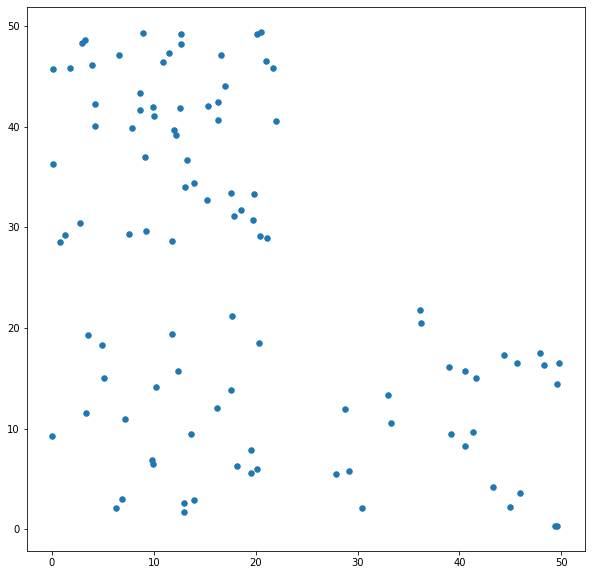

In [137]:
plt.figure(figsize=(10, 10))
plt.scatter(Xs, Ys, s = 30)

In [14]:
data = np.transpose(np.asarray([Xs, Ys]))

In [30]:
clustering = AgglomerativeClustering(n_clusters = 5, linkage = 'complete').fit(data)

In [31]:
A = clustering.labels_

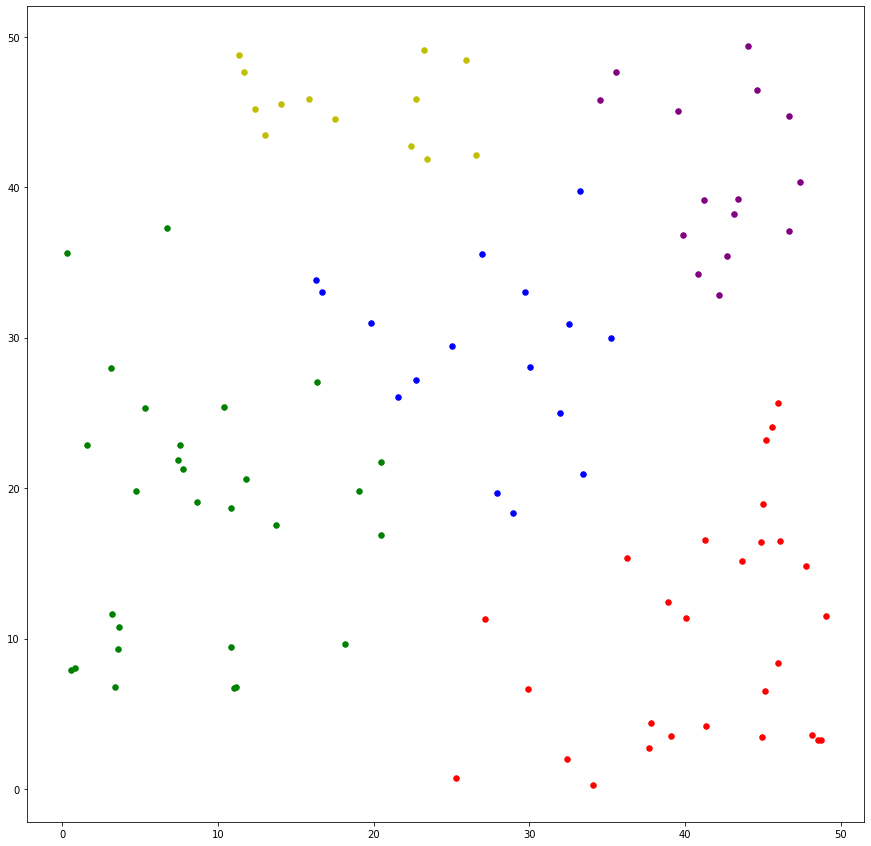

In [32]:
X0 = [Xs[i] for i in range(100) if A[i] == 0] 
X1 = [Xs[i] for i in range(100) if A[i] == 1] 
X2 = [Xs[i] for i in range(100) if A[i] == 2] 
X3 = [Xs[i] for i in range(100) if A[i] == 3] 
X4 = [Xs[i] for i in range(100) if A[i] == 4] 
Y0 = [Ys[i] for i in range(100) if A[i] == 0] 
Y1 = [Ys[i] for i in range(100) if A[i] == 1] 
Y2 = [Ys[i] for i in range(100) if A[i] == 2] 
Y3 = [Ys[i] for i in range(100) if A[i] == 3] 
Y4 = [Ys[i] for i in range(100) if A[i] == 4] 
plt.figure(figsize=(15, 15))
plt.scatter(X0, Y0, s = 30, color = 'r')
plt.scatter(X1, Y1, s = 30, color = 'b')
plt.scatter(X2, Y2, s = 30, color = 'g')
plt.scatter(X3, Y3, s = 30, color = 'y')
plt.scatter(X4, Y4, s = 30, color = 'purple')

In [146]:
T= 0.05 / (1 - 0.05 * 1)

In [147]:
import random
random.seed(10)
heads = []
for i in range(100):
    if random.uniform (0,1) <= T: 
        heads.append([Xs[i], Ys[i]])
heads = np.array(heads)
heads[0][1], heads

(6.02346352561869,
 array([[20.10706215,  6.02346353],
        [ 9.20362773, 29.64004278],
        [12.65690382, 48.21082925],
        [22.02760497, 40.59863406],
        [ 2.71796761, 30.39317508]]))

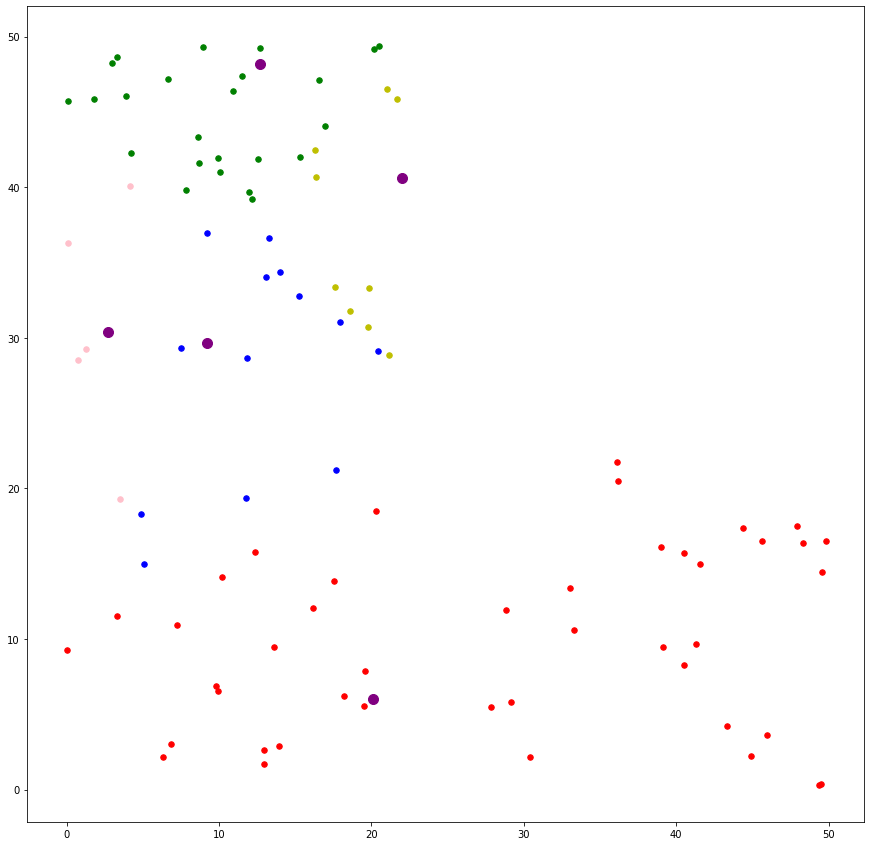

In [150]:
X0 = []
Y0 = []
X1 = []
Y1 = []
X2 = []
Y2 = []
X3 = []
Y3 = []
X4 = []
Y4 = []

def distance(x_1, x_2, y_1, y_2):
    return (x_1 - x_2)**2 + (y_1 - y_2)**2

def choose(x_1, y_1):
    dis0 = distance(x_1, heads[0][0], y_1, heads[0][1])
    dis1 = distance(x_1, heads[1][0], y_1, heads[1][1])
    dis2 = distance(x_1, heads[2][0], y_1, heads[2][1])
    dis3 = distance(x_1, heads[3][0], y_1, heads[3][1])
    dis4 = distance(x_1, heads[4][0], y_1, heads[4][1])
    dis = np.min(np.asarray([dis0, dis1, dis2, dis3, dis4]))
    if dis0 == dis:
        X0.append(x_1)
        Y0.append(y_1)
    if dis1 == dis:
        X1.append(x_1)
        Y1.append(y_1)
    if dis2 == dis:
        X2.append(x_1)
        Y2.append(y_1)
    if dis3 == dis:
        X3.append(x_1)
        Y3.append(y_1)
    if dis4 == dis:
        X4.append(x_1)
        Y4.append(y_1)
        
for i in range(100):
    choose(Xs[i], Ys[i])
    
plt.figure(figsize=(15, 15))
plt.scatter(X0, Y0, s = 30, color = 'r')
plt.scatter(X1, Y1, s = 30, color = 'b')
plt.scatter(X2, Y2, s = 30, color = 'g')  
plt.scatter(X3, Y3, s = 30, color = 'y')
plt.scatter(X4, Y4, s = 30, color = 'pink')  
plt.scatter(heads[:, 0], heads[:, 1], s = 100, color = 'purple')

In [21]:
dis_vec = []
for i in range(100):
    li = []
    for j in range(100):
        dis = distance(Xs[i], Xs[j], Ys[i], Ys[j])
        li.append([dis, j])
    li.sort(key=lambda x: x[0])
    li = li[1:]
    dis_vec.append(li)
dis_vec = np.array(dis_vec)
dis_vec = dis_vec[:, :, 1]
dis_vec = dis_vec.astype(int).tolist()
n = 100
bitmap = [i for i in range(100)]
x = 0
while n > 5 and x < 10:
    x += 1
    for i in range(100):
        if dis_vec[dis_vec[i][0]][0] == i and dis_vec[i][0] > i:
            #print(dis_vec[i][0], i, bitmap[dis_vec[i][0]], bitmap[i])
            for k in range(100):
                if bitmap[k] == bitmap[dis_vec[i][0]]:
                    bitmap[k] = bitmap[i]
            a1 = dis_vec[i][0]
            a2 = i
            for k in range(100):
                if bitmap[k] == bitmap[i]:
                    if k in dis_vec[a1]:
                        dis_vec[a1].remove(k)
                    if k in dis_vec[a2]:
                        dis_vec[a2].remove(k)
    S = set()
    for p in bitmap:
        if p not in S:
            S.add(p)
    print(S)
    n = len(S)
    print(n, bitmap)

{0, 1, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 29, 31, 35, 36, 37, 39, 40, 41, 42, 45, 50, 51, 52, 54, 56, 57, 58, 60, 61, 65, 66, 67, 69, 70, 71, 75, 77, 78, 79, 81, 82, 86, 89, 93, 95, 96, 98, 99}
61 [0, 1, 18, 3, 3, 5, 6, 7, 8, 9, 10, 11, 50, 13, 14, 15, 8, 17, 18, 19, 20, 21, 22, 23, 24, 54, 26, 27, 56, 29, 35, 31, 96, 22, 1, 35, 36, 37, 35, 39, 40, 41, 42, 24, 39, 45, 37, 22, 31, 13, 50, 51, 52, 45, 54, 50, 56, 57, 58, 96, 60, 61, 0, 3, 20, 65, 66, 67, 66, 69, 70, 71, 24, 21, 18, 75, 10, 77, 78, 79, 54, 81, 82, 78, 66, 14, 86, 58, 56, 89, 42, 79, 77, 93, 29, 95, 96, 96, 98, 99]
{0, 1, 3, 5, 6, 7, 8, 9, 14, 15, 17, 18, 19, 20, 21, 24, 26, 29, 31, 37, 40, 41, 45, 50, 51, 52, 54, 57, 65, 66, 67, 71, 77, 78, 81, 86, 89, 96, 99}
39 [0, 1, 18, 3, 3, 5, 6, 7, 7, 9, 67, 29, 50, 3, 14, 15, 8, 17, 18, 19, 20, 40, 15, 3, 1, 54, 26, 3, 3, 29, 31, 31, 96, 15, 1, 31, 31, 37, 31, 9, 40, 41, 29, 1, 9, 45, 37, 15, 31, 3, 50, 51, 52, 45, 54, 50, 3, 57, 15, 96, 

In [138]:
dis_vec = []
for i in range(100):
    li = []
    for j in range(100):
        dis = distance(Xs[i], Xs[j], Ys[i], Ys[j])
        li.append([dis, j])
    li.sort(key=lambda x: x[0])
    li = li[1:]
    dis_vec.append(li)
dis_vec = np.array(dis_vec)
dis_vec = dis_vec[:, :, 1]
dis_vec = dis_vec.astype(int).tolist()
dis_vec

[[13,
  12,
  11,
  24,
  20,
  1,
  3,
  14,
  90,
  4,
  9,
  85,
  8,
  80,
  18,
  5,
  6,
  89,
  22,
  2,
  21,
  15,
  88,
  10,
  77,
  17,
  7,
  19,
  16,
  82,
  23,
  78,
  76,
  41,
  93,
  63,
  99,
  97,
  32,
  87,
  47,
  81,
  65,
  67,
  98,
  27,
  51,
  49,
  68,
  73,
  95,
  84,
  75,
  56,
  46,
  94,
  29,
  74,
  39,
  44,
  92,
  91,
  86,
  83,
  96,
  40,
  79,
  62,
  64,
  43,
  61,
  71,
  66,
  48,
  36,
  69,
  25,
  57,
  55,
  59,
  38,
  70,
  33,
  42,
  60,
  54,
  53,
  52,
  28,
  50,
  26,
  34,
  35,
  30,
  58,
  37,
  72,
  31,
  45],
 [24,
  18,
  5,
  20,
  0,
  6,
  2,
  12,
  15,
  13,
  11,
  8,
  9,
  22,
  80,
  3,
  14,
  17,
  4,
  90,
  19,
  85,
  7,
  23,
  21,
  41,
  77,
  63,
  32,
  88,
  10,
  47,
  65,
  89,
  27,
  67,
  16,
  51,
  49,
  73,
  68,
  78,
  99,
  56,
  46,
  93,
  82,
  74,
  29,
  39,
  87,
  44,
  76,
  81,
  97,
  40,
  62,
  64,
  61,
  84,
  43,
  98,
  71,
  36,
  94,
  66,
  69,
  48,
  25,
  57,
  5

In [139]:
A = []
bitmap = [1 for i in range(100)]
while True:
    if len([k for k in range(100) if bitmap[k] == 1]) == 0:
        break
    j = [k for k in range(100) if bitmap[k] == 1][0]
    B = []
    while True:
        B.append(j)
        bitmap[j] = 0
        if bitmap[dis_vec[j][0]] == 1:
            j = dis_vec[j][0]
        else:
            A.append(B)
            break
#print(A)
for B in A:
    for a in B:
        for b in B:
            if b in dis_vec[a]:
                dis_vec[a].remove(b)
temp = []
bitmap = [1 for i in range(len(A))]
for i in range(len(A)):
    for j in range(i + 1, len(A)):
        #print(A[i], A[j], dis_vec[A[i][len(A[i]) - 1]][0])
        if bitmap[i] != 0 and bitmap[j] != 0 and dis_vec[A[i][len(A[i]) - 1]][0] in A[j]:
            temp.append(np.append(A[i], A[j]).tolist())
            bitmap[i] = 0
            bitmap[j] = 0
A = temp
print(A)

# for B in A:
#     for a in B:
#         for b in B:
#             if b in dis_vec[a]:
#                 dis_vec[a].remove(b)
# temp = []
# bitmap = [1 for i in range(len(A))]
# for i in range(len(A)):
#     for j in range(i + 1, len(A)):
#         #print(A[i], A[j], dis_vec[A[i][len(A[i]) - 1]][0])
#         if bitmap[i] != 0 and bitmap[j] != 0 and dis_vec[A[i][0]][0] in A[j]:
#             temp.append(np.append(A[i], A[j]).tolist())
#             bitmap[i] = 0
#             bitmap[j] = 0
#             break
# A = temp
# print(A)

[[0, 13, 11, 12], [1, 24, 20], [3, 14, 4, 8, 9], [5, 6, 22], [7, 17, 19, 23, 15], [25, 66, 61], [26, 35, 42, 60], [27, 51, 32], [28, 30, 52, 53], [29, 39, 74], [31, 45, 34, 50, 58, 37], [33, 59, 40, 71, 55], [41, 63, 47, 67, 65], [44, 46, 56, 49], [62, 64, 69], [75, 95, 98], [76, 97, 82], [77, 88, 80], [78, 99, 93], [79, 91, 92, 84, 94], [85, 90, 89]]


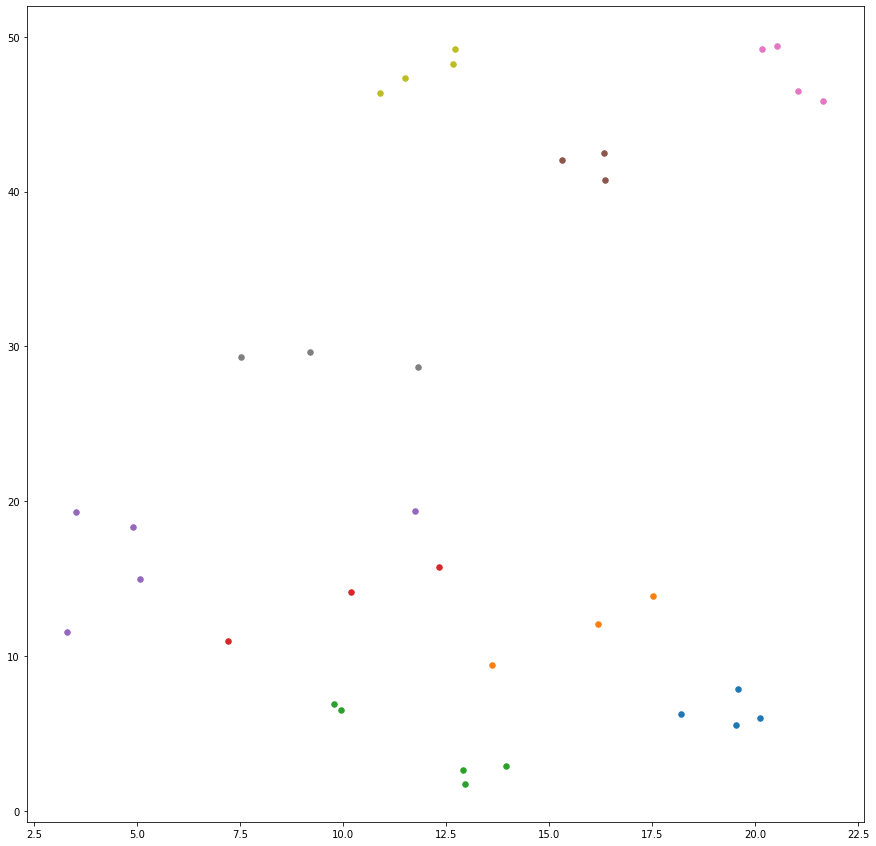

In [140]:
X0 = [Xs[i] for i in A[0]]
Y0 = [Ys[i] for i in A[0]]
X1 = [Xs[i] for i in A[1]]
Y1 = [Ys[i] for i in A[1]]
X2 = [Xs[i] for i in A[2]]
Y2 = [Ys[i] for i in A[2]]
X3 = [Xs[i] for i in A[3]]
Y3 = [Ys[i] for i in A[3]]
X4 = [Xs[i] for i in A[4]]
Y4 = [Ys[i] for i in A[4]]
X5 = [Xs[i] for i in A[5]]
Y5 = [Ys[i] for i in A[5]]
X6 = [Xs[i] for i in A[6]]
Y6 = [Ys[i] for i in A[6]]
X7 = [Xs[i] for i in A[7]]
Y7 = [Ys[i] for i in A[7]]
X8 = [Xs[i] for i in A[8]]
Y8 = [Ys[i] for i in A[8]]
plt.figure(figsize=(15, 15))
plt.scatter(X0, Y0, s = 30)
plt.scatter(X1, Y1, s = 30)
plt.scatter(X2, Y2, s = 30)  
plt.scatter(X3, Y3, s = 30)
plt.scatter(X4, Y4, s = 30) 
plt.scatter(X5, Y5, s = 30)
plt.scatter(X6, Y6, s = 30)  
plt.scatter(X7, Y7, s = 30)
plt.scatter(X8, Y8, s = 30) 
#plt.scatter(Xs, Ys, s = 30, color = 'black')

In [27]:
bitmap = [i for i in range(100)]
for k in range(3):
    for i in range(100):
        if dis_vec[i][k] > i and bitmap[dis_vec[i][k]] != bitmap[i]:
            for p in range(100):
                x = bitmap[dis_vec[i][k]]
                y = bitmap[i]
                if bitmap[p] == x:
                    bitmap[p] = y
S = set()
for p in bitmap:
    if p not in S:
        S.add(p)
print(S)
#print(bitmap)
# for i in range(50):
#     if dis_vec[i][3] > i and bitmap[dis_vec[i][3]] != bitmap[i]:
#         for p in range(100):
#             x = bitmap[dis_vec[i][3]]
#             y = bitmap[i]
#             if bitmap[p] == x:
#                 bitmap[p] = y
# S = set()
# for p in bitmap:
#     if p not in S:
#         S.add(p)
# print(S)
print(bitmap)

{35, 7, 41, 45, 78, 17, 50, 51, 21, 86, 54, 56}
[45, 41, 86, 51, 51, 51, 86, 7, 7, 41, 86, 45, 45, 41, 41, 41, 7, 45, 86, 7, 78, 41, 41, 41, 41, 7, 51, 51, 41, 45, 7, 86, 78, 41, 41, 7, 7, 41, 35, 41, 41, 41, 45, 41, 41, 45, 41, 41, 86, 41, 45, 51, 51, 45, 7, 45, 41, 41, 41, 78, 21, 7, 45, 51, 78, 41, 86, 86, 86, 86, 7, 41, 41, 21, 86, 45, 86, 51, 78, 41, 54, 51, 45, 78, 86, 21, 86, 41, 56, 51, 45, 41, 51, 41, 17, 78, 78, 78, 86, 50]


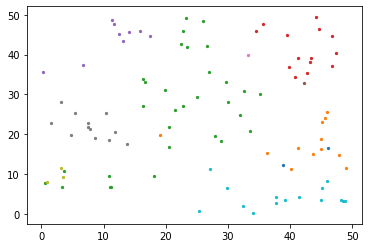

In [28]:
for s in S:
    plt.scatter(Xs[[i for i in range(100) if bitmap[i] == s]], Ys[[i for i in range(100) if bitmap[i] == s]], s = 5)

In [143]:
dis_vec = []
for i in range(100):
    li = []
    for j in range(100):
        dis = distance(Xs[i], Xs[j], Ys[i], Ys[j])
        li.append([dis, j])
    #li.sort(key=lambda x: x[0])
    #li = li[1:]
    dis_vec.append(np.asarray(li))
dis_vec = np.asarray(dis_vec)
dis_vec.shape

(100, 100, 2)

In [144]:
clusters = [[i] for i in range(100)]
def cluster_dis(i, j):
    list = [np.mean(dis_vec[k, clusters[j], 0]) for k in clusters[i]]
    return np.mean(list)

while len(clusters) > 5:
    min = float('inf')
    temp_i = -1
    temp_j = -1
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            if cluster_dis(i, j) < min:
                min = cluster_dis(i, j)
                temp_i = i
                temp_j = j
    new_clusters = []
    new_clusters.append(np.append(clusters[temp_i], clusters[temp_j]).tolist())
    for i in range(len(clusters)):
        if i != temp_i and i != temp_j:
            new_clusters.append(clusters[i])
    clusters = new_clusters

19 7
18 9
25 3
32 25
6 3


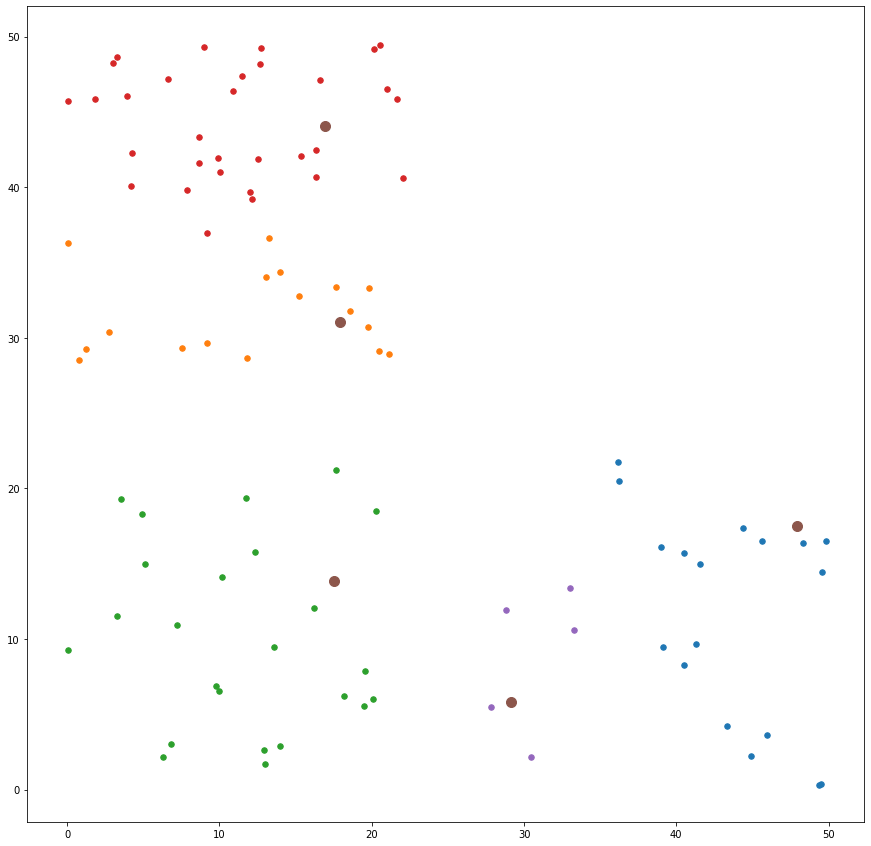

In [145]:
A = clusters
X0 = [Xs[i] for i in A[0]]
Y0 = [Ys[i] for i in A[0]]
X1 = [Xs[i] for i in A[1]]
Y1 = [Ys[i] for i in A[1]]
X2 = [Xs[i] for i in A[2]]
Y2 = [Ys[i] for i in A[2]]
X3 = [Xs[i] for i in A[3]]
Y3 = [Ys[i] for i in A[3]]
X4 = [Xs[i] for i in A[4]]
Y4 = [Ys[i] for i in A[4]]
plt.figure(figsize=(15, 15))
plt.scatter(X0, Y0, s = 30)
plt.scatter(X1, Y1, s = 30)
plt.scatter(X2, Y2, s = 30)  
plt.scatter(X3, Y3, s = 30)
plt.scatter(X4, Y4, s = 30) 
random.seed(4)
a = random.randint(0, len(A[0]) - 1)
b = random.randint(0, len(A[1]) - 1)
c = random.randint(0, len(A[2]) - 1)
d = random.randint(0, len(A[3]) - 1)
e = random.randint(0, len(A[4]) - 1)
print(len(A[0]), a)
print(len(A[1]), b)
print(len(A[2]), c)
print(len(A[3]), d)
print(len(A[4]), e)
plt.scatter([X0[a], X1[b], X2[c], X3[d], X4[e]], [Y0[a], Y1[b], Y2[c], Y3[d], Y4[e]], s = 100)

In [128]:
order = uniform.rvs(loc=0, scale=100, size=100)